<a href="https://colab.research.google.com/github/afif-af/ML/blob/main/deepLearningWithPython02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 03

In [1]:
import tensorflow as tf
x=tf.ones(shape=(2,1))

In [2]:
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [3]:
x=tf.zeros(shape=(2,1))

In [4]:
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [5]:
x=tf.random.normal(shape=(3,1),mean=0.,stddev=1.)

In [6]:
print(x)

tf.Tensor(
[[ 0.63530314]
 [ 0.6702068 ]
 [-0.22977926]], shape=(3, 1), dtype=float32)


In [7]:
x=tf.random.uniform(shape=(3,1),minval=0.,maxval=1.)

In [8]:
print(x)

tf.Tensor(
[[0.7337676 ]
 [0.82821214]
 [0.6772829 ]], shape=(3, 1), dtype=float32)


In [9]:
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.7337676 ],
       [0.82821214],
       [0.6772829 ]], dtype=float32)>

In [10]:
import numpy as np
x=np.ones(shape=(2,2))
x[0,0]=0.

In [11]:
x=tf.ones(shape=(2,2))
# x[0,0]=0.

In [12]:
v=tf.Variable(initial_value=tf.random.normal(shape=(3,1)))

In [13]:
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.44365707],
       [-0.4943729 ],
       [ 0.03122208]], dtype=float32)>


In [14]:
v.assign(tf.ones((3,1)))


<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [15]:
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [16]:
v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [17]:
a=tf.ones((2,2))
b=tf.square(a)
c=tf.sqrt(a)
d=b+c
e=tf.matmul(a,b)
e*=d

In [18]:
input_var=tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  result=tf.square(input_var)
grandient=tape.gradient(result,input_var)


In [19]:
input_const=tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result=tf.square (input_const)
gradient=tape.gradient(result, input_const)

In [20]:
time=tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position=4.9*time**2
  speed= inner_tape.gradient(position,time)
acceleration=outer_tape.gradient(speed,time)

In [21]:
num_samples_per_class=1000
negative_samples=np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class
)
positive_samples=np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class
)


In [22]:
inputs=np.vstack((negative_samples,positive_samples)).astype(np.float32)

In [23]:
targets=np.vstack((np.zeros((num_samples_per_class,1),dtype="float32"),
                   np.ones((num_samples_per_class,1),dtype="float32")))

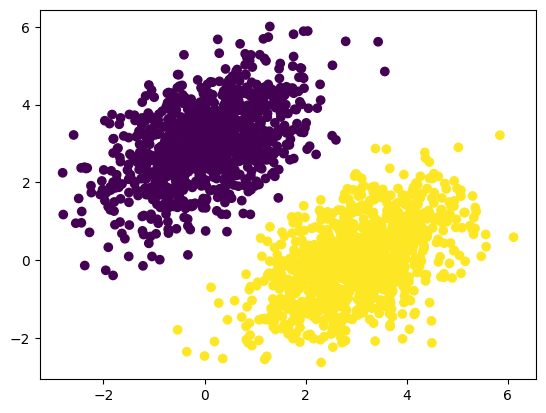

In [24]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0],inputs[:,1],c=targets[:,0])
plt.show()

In [25]:
input_dim=2
output_dim=1
w=tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim)))
b=tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [26]:
def model(inputs):
  return tf.matmul(inputs,w)+b

In [27]:
def square_loss(targets,predictions):
  per_sample_losses=tf.square(targets-predictions)
  return tf.reduce_mean(per_sample_losses)

In [28]:
learning_rate=0.1
def training_step(inputs,targets):
  with tf.GradientTape() as tape:
    predictions=model(inputs)
    loss=square_loss(predictions,targets)
  grad_loss_w,grad_loss_b=tape.gradient(loss,[w,b])
  w.assign_sub(grad_loss_w* learning_rate)
  b.assign_sub(grad_loss_b* learning_rate)
  return loss

In [29]:
for step in range(40):
  loss=training_step(inputs,targets)
  print(f"loss{step}: {loss:.4f}")

loss0: 6.8741
loss1: 1.0140
loss2: 0.2754
loss3: 0.1676
loss4: 0.1439
loss5: 0.1322
loss6: 0.1228
loss7: 0.1144
loss8: 0.1068
loss9: 0.0998
loss10: 0.0934
loss11: 0.0875
loss12: 0.0821
loss13: 0.0772
loss14: 0.0728
loss15: 0.0687
loss16: 0.0649
loss17: 0.0615
loss18: 0.0584
loss19: 0.0555
loss20: 0.0529
loss21: 0.0505
loss22: 0.0483
loss23: 0.0463
loss24: 0.0445
loss25: 0.0428
loss26: 0.0413
loss27: 0.0399
loss28: 0.0386
loss29: 0.0374
loss30: 0.0363
loss31: 0.0354
loss32: 0.0345
loss33: 0.0337
loss34: 0.0329
loss35: 0.0322
loss36: 0.0316
loss37: 0.0310
loss38: 0.0305
loss39: 0.0300


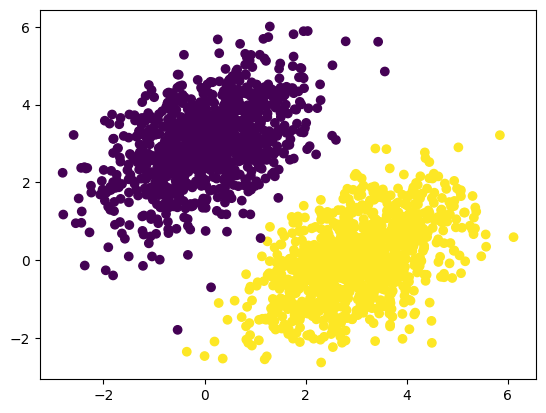

In [30]:
predictions=model(inputs)
plt.scatter(inputs[:,0],inputs[:,1],c=predictions[:,0]>0.5)
plt.show()

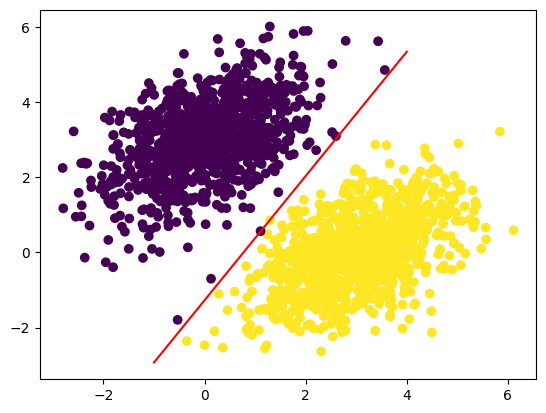

In [31]:
x=np.linspace(-1,4,100)
y=-w[0]/w[1]*x+(0.5-b)/w[1]
plt.plot(x,y,"-r")
plt.scatter(inputs[:,0],inputs[:,1],c=predictions[:,0]>0.5)


In [32]:
from tensorflow import keras

In [33]:
class SimpleDense(keras.layers.Layer):
  def __init__(self,units,activation=None):
    super().__init__()
    self.units=units
    self.activation=activation

  def build(self,input_shape):
    input_dim=input_shape[-1]
    self.w=self.add_weight(shape=(input_dim,self.units),
                           initializer="random_normal")
    self.b=self.add_weight(shape=(self.units,),
                           initializer="zeros")
  def call(self,inputs):
    y=tf.matmul(inputs,self.w)+self.b
    if self.activation is not None:
      y=self.activation(y)
    return y

In [34]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [35]:
from tensorflow.keras import layers
layer=layers.Dense(32,activation="relu")

In [36]:
from tensorflow.keras import models,layers

In [37]:
model=models.Sequential([
    layers.Dense(32,activation='relu'),
    layers.Dense(32)
])

In [38]:
# model = NaiveSequential([
# NaiveDense(input_size=784, output_size=32, activation="relu"),
# NaiveDense(input_size=32, output_size=64, activation="relu"),
# NaiveDense(input_size=64, output_size=32, activation="relu"),
# NaiveDense(input_size=32, output_size=10, activation="softmax")
# ])

In [39]:
def __call__(self, inputs):
  if not self.built:
    self.build(inputs.shape)
    self.built = True
  return self.call(inputs)

In [40]:
model=keras.Sequential([
    SimpleDense(32,activation="relu"),
    SimpleDense(64,activation="relu"),
    SimpleDense(32,activation="relu"),
    SimpleDense(10,activation="softmax"),
])

In [41]:
model.compile(optimizer=keras.optimizers.RMSprop(),
  loss=keras.losses.MeanSquaredError(),
  metrics=[keras.metrics.BinaryAccuracy()])

In [42]:
# model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
# loss=my_custom_loss,
# metrics=[my_custom_metric_1, my_custom_metric_2])

In [43]:
# history = model.fit(
# inputs,
# targets,
# epochs=5,
# batch_size=128
# )

In [44]:
model=keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [45]:
indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]

training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

model.fit(
training_inputs,
training_targets,
epochs=5,
batch_size=16,
validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - binary_accuracy: 0.9288 - loss: 0.1639 - val_binary_accuracy: 0.9967 - val_loss: 0.0441
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - binary_accuracy: 0.9648 - loss: 0.0694 - val_binary_accuracy: 0.9950 - val_loss: 0.0353
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 0.9476 - loss: 0.0759 - val_binary_accuracy: 0.8783 - val_loss: 0.1480
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - binary_accuracy: 0.9558 - loss: 0.0733 - val_binary_accuracy: 0.6733 - val_loss: 0.4905
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - binary_accuracy: 0.9406 - loss: 0.0851 - val_binary_accuracy: 1.0000 - val_loss: 0.0360


In [46]:
loss_andf_metrics=model.evaluate(val_inputs,val_targets,batch_size=128)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - binary_accuracy: 1.0000 - loss: 0.0344 


In [47]:
predictions=model.predict(val_inputs,batch_size=128)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [48]:
print(predictions[:10])

[[0.7472143 ]
 [0.98918605]
 [0.8869328 ]
 [0.17296699]
 [0.7848569 ]
 [0.12451774]
 [0.10410628]
 [0.07721871]
 [0.7994957 ]
 [0.7297189 ]]


# Chapter 04

In [49]:
from tensorflow.keras.datasets import imdb
(train_data,train_label),(test_data,test_label)=imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [50]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [51]:
train_label[0]

np.int64(1)

In [52]:
max([max(sequence) for sequence in train_data])

9999

In [53]:
world_index=imdb.get_word_index()
reverse_word_index=dict(
    [(value,key) for (key, value) in world_index.items()]
)
deconded_review=" ".join(
    [reverse_word_index.get(i-3,"?") for i in train_data[0]]
)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [54]:
import numpy as np
def vectorize_sequences(sequences,dimention=10000):
  results=np.zeros((len(sequences),dimention))
  for i ,sequence in enumerate(sequences):
    for j in sequence:
      results[i,j]=1.
  return results

x_train=vectorize_sequences(train_data)
y_train=vectorize_sequences(test_data)

In [55]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [56]:
y_train=np.asarray(train_label).astype("float32")
y_test=np.asarray(test_label).astype("float32")

In [57]:
from tensorflow import keras
from tensorflow.keras import layers

model=keras.Sequential([
    layers.Dense(16,activation="relu"),
    layers.Dense(16,activation="relu"),
    layers.Dense(1,activation="sigmoid")
])


In [58]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [59]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [60]:
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.6970 - loss: 0.6105 - val_accuracy: 0.8565 - val_loss: 0.4314
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8936 - loss: 0.3682 - val_accuracy: 0.8520 - val_loss: 0.3666
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9168 - loss: 0.2699 - val_accuracy: 0.8869 - val_loss: 0.2935
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9384 - loss: 0.2100 - val_accuracy: 0.8867 - val_loss: 0.2828
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9479 - loss: 0.1756 - val_accuracy: 0.8867 - val_loss: 0.2783
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9520 - loss: 0.1498 - val_accuracy: 0.8873 - val_loss: 0.2790
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9609 - loss: 0.1273 - val_accuracy: 0.8794 - val_loss: 0.3129
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9720 - loss: 0.1066 - val_accuracy: 0.8825 - v

In [61]:
histor_dict=history.history
histor_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

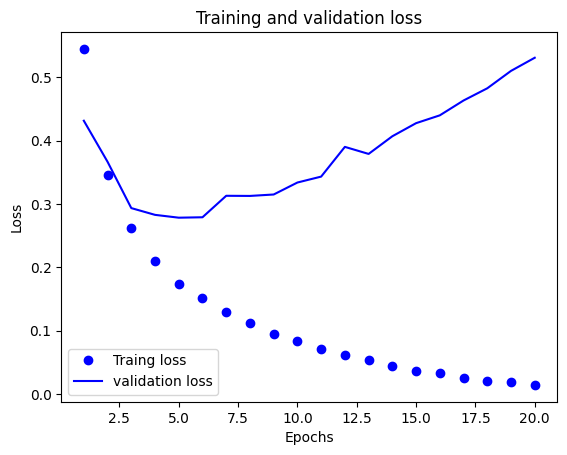

In [62]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_value=history_dict["loss"]
val_loss_values=history_dict["val_loss"]
epochs=range(1,len(loss_value)+1)
plt.plot(epochs,loss_value,"bo",label="Traing loss")
plt.plot(epochs,val_loss_values,"b",label="validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

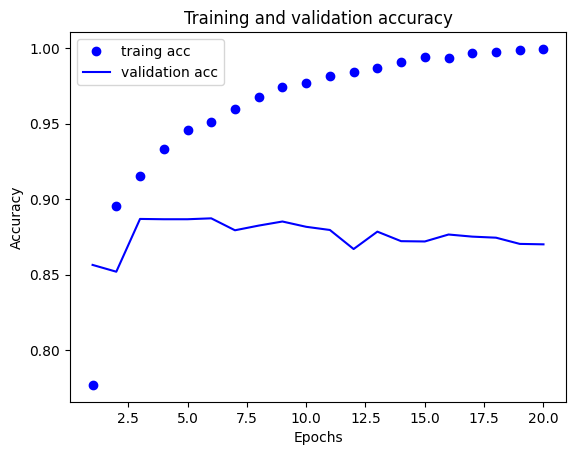

In [63]:
plt.clf()
acc=history_dict["accuracy"]
val_acc=history_dict["val_accuracy"]
plt.plot(epochs,acc,"bo",label="traing acc")
plt.plot(epochs,val_acc,"b",label="validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [64]:
# model = keras.Sequential([
# layers.Dense(16, activation="relu"),
# layers.Dense(16, activation="relu"),
#                            layers.Dense(1, activation="sigmoid")
# ])
# model.compile(optimizer="rmsprop",
# loss="binary_crossentropy",
# metrics=["accuracy"])
# model.fit(x_train, y_train, epochs=4, batch_size=512)
# results = model.evaluate(train_data, y_test)

In [65]:
# results

In [66]:
# model.predict(x_test)

In [67]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [68]:
len(train_data)

8982

In [69]:
len(test_data)

2246

In [70]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [71]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
[reverse_word_index.get(i - 3, "?") for i in train_data[0]])

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [72]:
train_label[10]

np.int64(1)

In [73]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [74]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)


In [75]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [76]:
model = keras.Sequential([
layers.Dense(64, activation="relu"),
layers.Dense(64, activation="relu"),
layers.Dense(46, activation="softmax")
])

In [77]:
model.compile(optimizer="rmsprop",
loss="categorical_crossentropy",
metrics=["accuracy"])

In [78]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [79]:
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.4113 - loss: 3.4099 - val_accuracy: 0.6250 - val_loss: 2.0687
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6569 - loss: 1.7967 - val_accuracy: 0.6840 - val_loss: 1.4377
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.7254 - loss: 1.2615 - val_accuracy: 0.7370 - val_loss: 1.2292
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - accuracy: 0.7799 - loss: 1.0250 - val_accuracy: 0.7600 - val_loss: 1.1153
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - accuracy: 0.8199 - loss: 0.8449 - val_accuracy: 0.7950 - val_loss: 1.0296
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.8509 - loss: 0.7066 - val_accuracy: 0.7850 - val_loss: 1.0004
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.8815 - loss: 0.5789 - val_accuracy: 0.7830 - val_loss: 0.9862
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.8954 - loss: 0.4953 - val_accuracy: 0.81

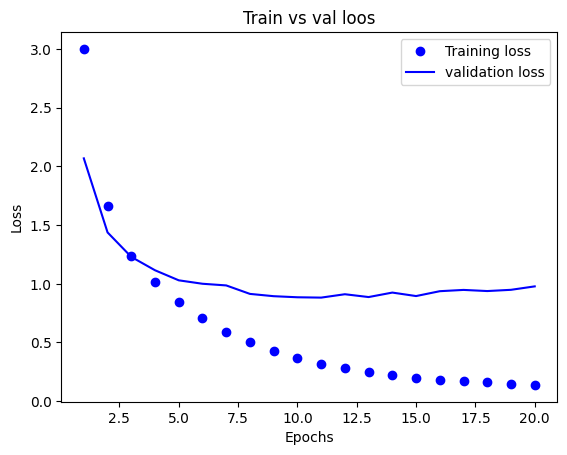

In [80]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,"bo",label="Training loss")
plt.plot(epochs,val_loss,"b",label="validation loss")
plt.title("Train vs val loos")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

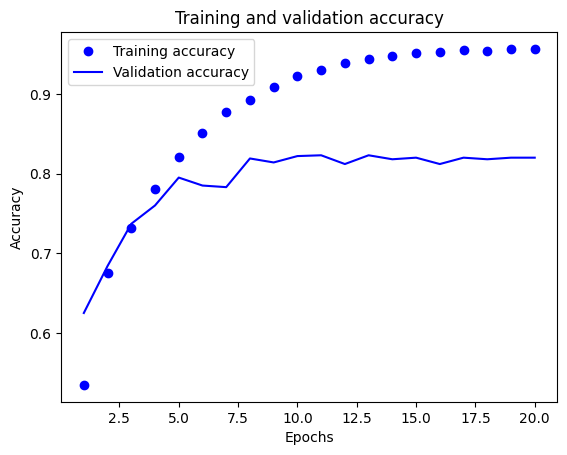

In [81]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [82]:
results=model.evaluate(x_test,y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8046 - loss: 0.9791


In [83]:
model = keras.Sequential([
layers.Dense(64, activation="relu"),
layers.Dense(64, activation="relu"),
layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
loss="categorical_crossentropy",
metrics=["accuracy"])
model.fit(x_train,
y_train,
epochs=9,
batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3985 - loss: 3.1187
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6738 - loss: 1.5762
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.7428 - loss: 1.1501
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7978 - loss: 0.9323
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8209 - loss: 0.8001
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.8593 - loss: 0.6503
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.8839 - loss: 0.5468
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9059 - loss: 0.4577
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9199 - loss: 0.3892
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7970 - loss: 0.9018


In [84]:
results

[0.9150754809379578, 0.790739119052887]

In [85]:
import copy
test_labels_copy=copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array=np.array(test_labels)==np.array(test_labels_copy)
hits_array.mean()

np.float64(0.1767586821015138)

In [86]:
predictions=model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [87]:
predictions[0].shape

(46,)

In [88]:
np.sum(predictions[0])

np.float32(0.9999999)

In [88]:
np.argmax(predictions[0])

In [89]:
y_train=np.array(train_labels)
y_test=np.array(test_labels)

In [90]:
model.compile(optimizer="rmsprop",
              loss="sparce_categorical_crossentrophy",
              metrics=["accuracy"])

In [91]:
model=keras.Sequential([
    layers.Dense(64,activation="relu"),
    layers.Dense(4,activation="relu"),
    layers.Dense(46,activation="softmax")
])

In [96]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [98]:
# model.fit(partial_x_train,
# partial_y_train,
# epochs=20,
# batch_size=128,
# validation_data=(x_val, y_val))

In [99]:
from tensorflow.keras.datasets import boston_housing

In [100]:
(train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [101]:
train_data.shape

(404, 13)

In [102]:
test_data.shape

(102, 13)

In [103]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [104]:
mean=train_data.mean(axis=0)
train_data-=mean
std=train_data.std(axis=0)
train_data/=std
test_data-=mean
test_data/=std

In [105]:
def build_model():
  model=keras.Sequential([
      layers.Dense(64,activation="relu"),
      layers.Dense(64,activation="relu"),
      layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop",loss="mse",metrics=["mae"])
  return model

In [106]:
k=4
num_val_samples=len(train_data)//k
num_epochs=100
all_scores=[]
for i in range(k):
  print(f"processing fold #{i}")
  val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
  val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]
  partial_train_data=np.concatenate(
      [train_data[:i*num_val_samples],
       train_data[(i+1)*num_val_samples:]],
      axis=0
  )
  partial_train_targets=np.concatenate(
      [train_targets[:i*num_val_samples],
       train_targets[(i+1)*num_val_samples:]],
      axis=0
  )
  model=build_model()
  model.fit(partial_train_data,
            partial_train_targets,
            epochs=num_epochs,batch_size=1,verbose=0)
  val_mse,val_mae=model.evaluate(val_data,val_targets,verbose=0)
  all_scores.append(val_mae)

processing fold #0
processing fold #1
processing fold #2
processing fold #3


In [107]:
all_scores

[2.528724193572998, 2.4358115196228027, 2.617253065109253, 2.358666181564331]

In [108]:
np.mean(all_scores)

np.float64(2.485113739967346)

In [109]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
  [train_data[:i * num_val_samples],
  train_data[(i + 1) * num_val_samples:]],
  axis=0)
  partial_train_targets = np.concatenate(
  [train_targets[:i * num_val_samples],
  train_targets[(i + 1) * num_val_samples:]],
  axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
  validation_data=(val_data, val_targets),
  epochs=num_epochs, batch_size=16, verbose=0)
  mae_history = history.history["val_mae"]
  all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [111]:
average_mae_history=[
    np.mean([x[i]for x in all_mae_histories]) for i in range(num_epochs)
]

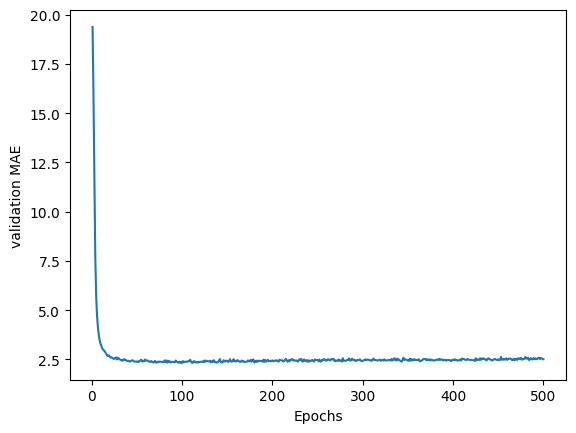

In [112]:
plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("validation MAE")
plt.show()

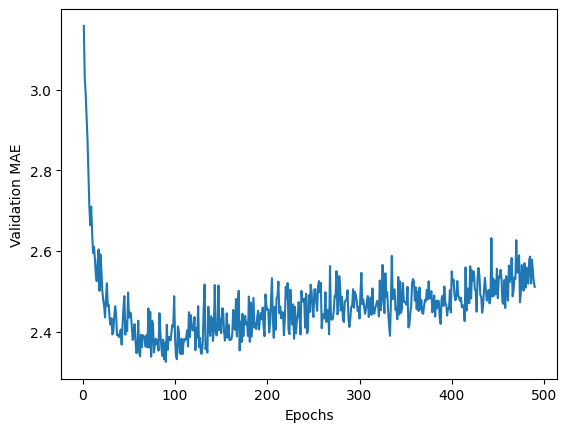

In [113]:
truncated_mae_history=average_mae_history[10:]
plt.plot(range(1,len(truncated_mae_history)+1),truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [114]:
model=build_model()
model.fit(train_data,train_targets,epochs=80,batch_size=16,verbose=0)
test_mse_score,test_mae_score=model.evaluate(test_data,test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13.0557 - mae: 2.5490 


In [115]:
test_mae_score

2.792545795440674

In [116]:
predictions=model.predict(test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [117]:
predictions[0]

array([9.570302], dtype=float32)

# Chapter 05